In [4]:
import matplotlib.pyplot as plt
import cv2

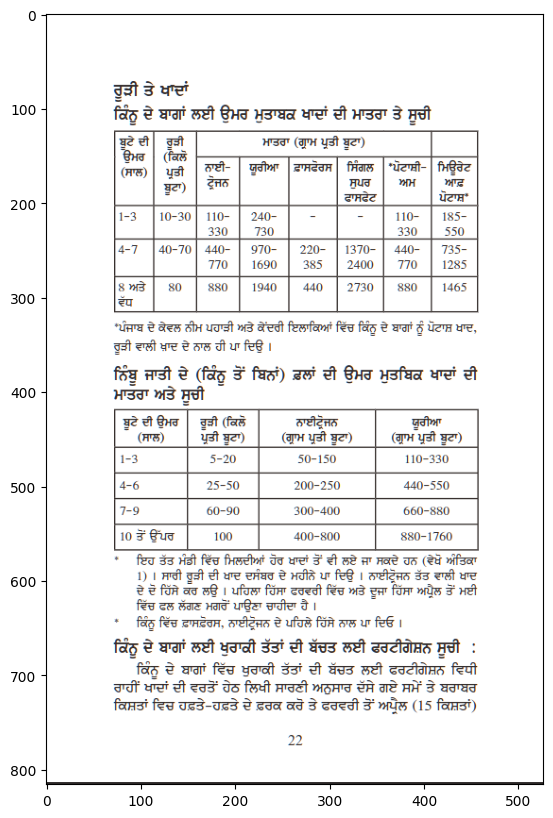

In [51]:
img = cv2.imread('sample.png')
plt.figure(figsize=(15,10))
plt.imshow(img)

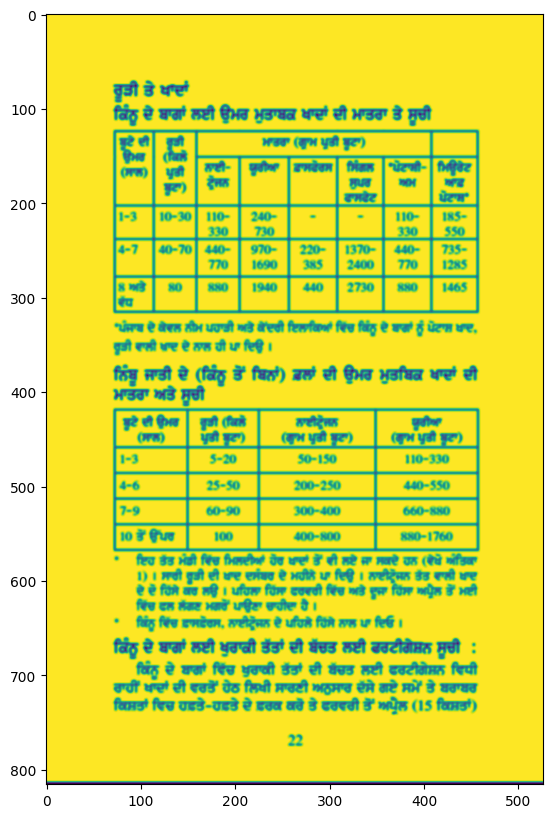

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure(figsize=(15,10))
plt.imshow(gray)

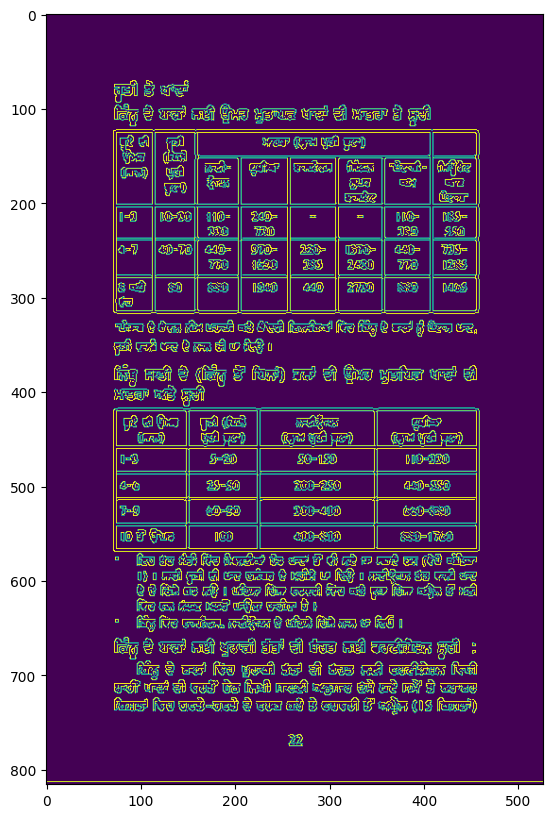

In [53]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
plt.figure(figsize=(15,10))
plt.imshow(edges)

In [54]:
def area(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (max(x)-min(x))*(max(y)-min(y))

def start_point(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (min(x),max(y))

def end_point(approx):
    x = approx[:,0,0]
    y = approx[:,0,1]
    return (max(x),min(y))
    
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    epsilon = 0.05 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4:
        if (area(approx)>10000):
#                 print(area(approx))
            cv2.rectangle(img, start_point(approx),end_point(approx), (255, 255, 255), -1)

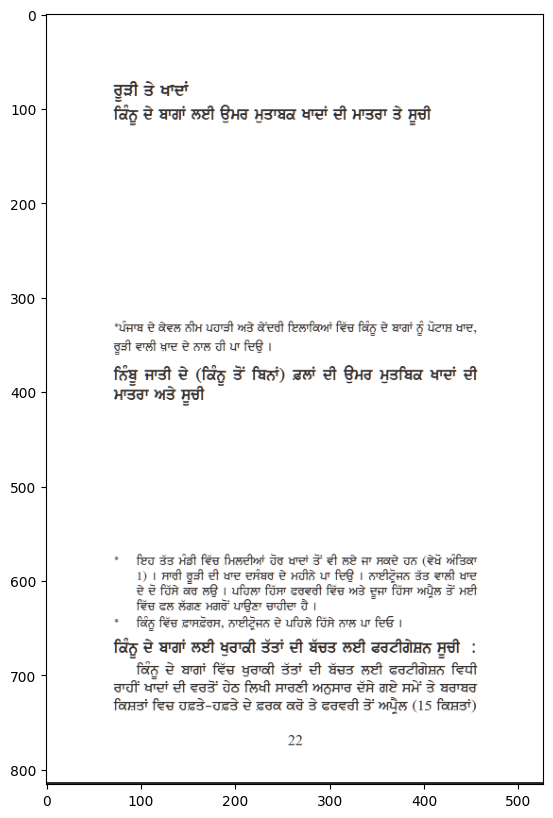

In [55]:
plt.figure(figsize=(15,10))
plt.imshow(img)

In [ ]:
def remove_table(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            if (area(approx)>10000):
#                 print(area(approx))
                cv2.rectangle(image, start_point(approx),end_point(approx), (255, 255, 255), -1)
    return image